In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [266]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [28]:
file_path = "F:\\schulich\\datacamp\\applied finance\\2- Quantitative Risk Management in Python\\FourBanksFinancialCrisis.xlsx"
# Read in the excelfile and parse dates
portfolio = pd.read_excel(file_path, parse_dates = ['Date'], index_col='Date')
portfolio

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,481.799988,55.520000,104.040001,39.009998
2005-01-03,482.700012,55.900002,104.949997,39.150002
2005-01-04,478.600006,55.299999,104.269997,38.410000
2005-01-05,484.600006,54.980000,103.800003,38.490002
2005-01-06,489.299988,56.279999,105.230003,38.709999
...,...,...,...,...
2010-12-23,46.799999,27.410000,167.600006,42.080002
2010-12-27,47.700001,27.510000,169.830002,42.669998
2010-12-28,47.799999,27.660000,169.190002,42.610001


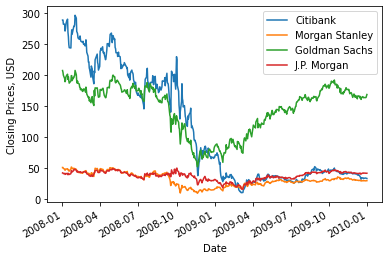

In [3]:
# we are only interested in the time when financial crisis happened, let extract that time period
# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices.plot().set_ylabel("Closing Prices, USD")
plt.show()

In [4]:
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
asset_returns

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2008-01-02,NaN,NaN,NaN,NaN
2008-01-03,0.000346,-0.000196,-0.013295,-0.006877
2008-01-04,-0.023851,-0.032195,-0.023970,-0.022684
2008-01-07,0.000708,-0.020081,-0.026009,0.010017
2008-01-08,-0.039632,-0.039536,-0.026858,-0.039671
...,...,...,...,...
2009-12-24,0.018237,0.006460,0.002078,0.007940
2009-12-28,0.011940,-0.010473,-0.001281,-0.004058
2009-12-29,-0.005900,0.004780,0.002198,-0.005513


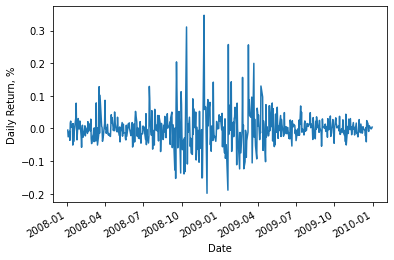

In [5]:

# set the weights : make sure your weights are in an Array not list, becuase list does not have transpose and give error 
# when you try to calculate the variance of your portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

# caculate the portfolio return
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

In [6]:
# in order to get the volatility (std) of our portfolio we need to get covariance matrix first
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
covariance

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Citibank,1.475195,0.821707,0.573790,0.724639
Morgan Stanley,0.821707,1.298341,0.658895,0.560523
Goldman Sachs,0.573790,0.658895,0.500807,0.426979
J.P. Morgan,0.724639,0.560523,0.426979,0.685584


In [7]:
portfolio_volatility = np.sqrt(np.dot(weights.T , np.dot(covariance, weights)))
portfolio_volatility

0.8475328513962702

In [8]:
# there is another way to calculate the volatility
portfolio_volatility =  np.sqrt(np.transpose(weights) @ covariance @ weights)
portfolio_volatility

0.8475328513962702

In [9]:
# Calculate the 30-day rolling window std of portfolio returns
returns_windowed_std = portfolio_returns.rolling(30).std()
returns_windowed_std

Date
2008-01-02         NaN
2008-01-03         NaN
2008-01-04         NaN
2008-01-07         NaN
2008-01-08         NaN
                ...   
2009-12-24    0.015490
2009-12-28    0.015228
2009-12-29    0.015231
2009-12-30    0.014714
2009-12-31    0.014785
Length: 505, dtype: float64

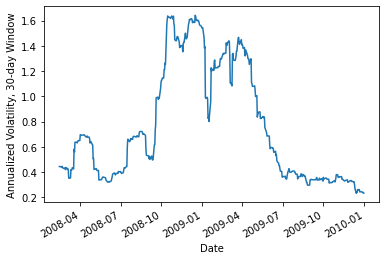

In [10]:
# Compute the annualized volatility series
volatility_series = returns_windowed_std*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

In [11]:
# Frequency resampling primer
# Risk factor models often rely upon data that is of different frequencies. A typical example is when using quarterly
# macroeconomic data, such as prices, unemployment rates, etc., with financial data, which is often daily 
# (or even intra-daily). To use both data sources in the same model, higher frequency data needs to be resampled to
# match the lower frequency data.

# Convert daily returns to quarterly average returns
returns_q = asset_returns .resample('Q').mean()

# Examine the beginning of the quarterly series
print(returns_q.head())

# Now convert daily returns to weekly minimum returns
returns_w = asset_returns .resample('W').min()

# Examine the beginning of the weekly series
print(returns_w.head())

            Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Date                                                            
2008-03-31 -0.004242       -0.000883      -0.003190     0.000927
2008-06-30 -0.003373       -0.003271       0.001139    -0.003158
2008-09-30  0.005301       -0.004729      -0.003680     0.006881
2008-12-31 -0.010607        0.004040      -0.003728    -0.003625
2009-03-31 -0.006239        0.009373       0.005833     0.000691
            Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Date                                                            
2008-01-06 -0.023851       -0.032195      -0.023970    -0.022684
2008-01-13 -0.039632       -0.039536      -0.026858    -0.039671
2008-01-20 -0.072953       -0.045157      -0.041458    -0.052950
2008-01-27 -0.025247       -0.045676      -0.039307    -0.029359
2008-02-03 -0.001075       -0.022092      -0.001019    -0.002108


In [177]:
# assume you are an investor of Citiban which is highly engaged in MBS, so default(delinquency) is one
# of the most important risk factors that your Citibank share price is exposed to, and you want to see how corrlated 
# this share price is to Delinquency risk factor. 
# As deliquency is reported quaretely but your share price and share return has daily frequency you need to convert it to
# quartely return. you can use eaither mean or min as a proxy of your quarterly return.

# first download delinqueny data - 90 days delinquency rate is percentage of mortgage with more than 3 monthly unpaid
# mortgage installments
file_path = "F:\\schulich\\datacamp\\applied finance\\2- Quantitative Risk Management in Python\\90 days delinquency rate.xlsx"
# Read in the excelfile and parse dates
mort_del = pd.read_excel(file_path, parse_dates = ['Date'], index_col='Date')
mort_del

,Mortgage Delinquency Rate
Date,
2005-03-31,0.0155
2005-06-30,0.0159
2005-09-30,0.0163
2005-12-31,0.0161
2006-03-31,0.0162
2006-06-30,0.0174
2006-09-30,0.0192
2006-12-31,0.0208
2007-03-31,0.0231


In [13]:
# we also need the daily return of Citibank in the same period
Citibank_portfolio_returns = portfolio['Citibank'].pct_change()
Citibank_portfolio_returns

Date
2004-12-31         NaN
2005-01-03    0.001868
2005-01-04   -0.008494
2005-01-05    0.012537
2005-01-06    0.009699
                ...   
2010-12-23   -0.010571
2010-12-27    0.019231
2010-12-28    0.002096
2010-12-29   -0.002092
2010-12-30   -0.002096
Name: Citibank, Length: 1511, dtype: float64

In [14]:
# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_avg = pd.DataFrame(Citibank_portfolio_returns.resample('Q').mean().dropna())
portfolio_q_avg

,Citibank
Date,
2005-03-31,-0.001105
2005-06-30,0.000470
2005-09-30,-0.000214
2005-12-31,0.001043
2006-03-31,-0.000393
2006-06-30,0.000391
2006-09-30,0.000490
2006-12-31,0.001859
2007-03-31,-0.001265


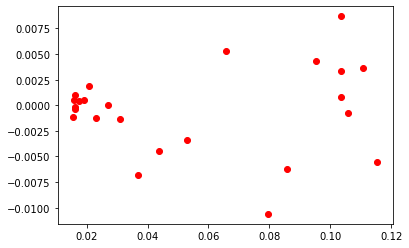

In [15]:
# Create a scatterplot between delinquency and quarterly minimum returns
plt.plot(mort_del, portfolio_q_avg, 'o', color='red')
plt.show()

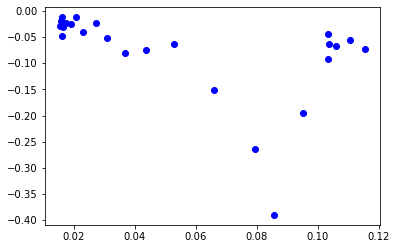

In [16]:
# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min =  Citibank_portfolio_returns.resample('Q').min().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.plot(mort_del, portfolio_q_min, 'o', color='blue')
plt.show()

In [17]:
# in order to better understand the relation and correlation between these two variable we can conduct a regression model.

# First import the relavant library for regression
import statsmodels.api as sm

# Add a constant to the regression
mort_del_constant_added = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_q_avg, mort_del_constant_added).fit()

# Print a summary of the results
results.summary()

# p-value 0.625 which is way greater than 5% show no strong relationship

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Citibank   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2456
Date:                Wed, 28 Jul 2021   Prob (F-statistic):              0.625
Time:                        21:35:41   Log-Likelihood:                 97.745
No. Observations:                  24   AIC:                            -191.5
Df Residuals:                      22   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0011      0.002     -0.724      0.477      -0.004       0.002
Mortgage Delinquency Rate     0.0116      0.023      0.496      0.625      -0.037       0.060
==============================================================================
Omnibus:                        2.275   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.110
Skew:                          -0.498   Prob(JB):                        0.574
Kurtosis:                       3.345   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_q_min, mort_del_constant_added).fit()

# Print a summary of the results
print(results.summary())

# p value is 0.027 which is smaller than 5% showing strong relationship

                            OLS Regression Results                            
Dep. Variable:               Citibank   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5.592
Date:                Wed, 28 Jul 2021   Prob (F-statistic):             0.0273
Time:                        21:35:41   Log-Likelihood:                 27.226
No. Observations:                  24   AIC:                            -50.45
Df Residuals:                      22   BIC:                            -48.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

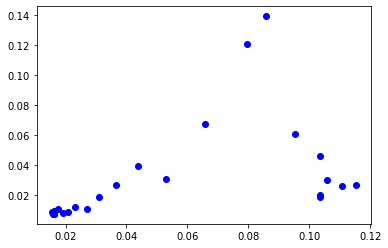

In [19]:
# we can even check if there is relationship between the volatility of the stock price and delinquency rate
# to do so we need to get rolling volatility to check the impact in different times

# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_vol =  Citibank_portfolio_returns.resample('Q').std().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.plot(mort_del, portfolio_q_vol, 'o', color='blue')
plt.show()

In [20]:
# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_q_vol, mort_del_constant_added).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Citibank   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     6.282
Date:                Wed, 28 Jul 2021   Prob (F-statistic):             0.0201
Time:                        21:35:41   Log-Likelihood:                 50.158
No. Observations:                  24   AIC:                            -96.32
Df Residuals:                      22   BIC:                            -93.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [21]:
# Import the mean_historical_return method
from pypfopt.expected_returns import mean_historical_return
mean_returns = mean_historical_return(portfolio, frequency = 252) # use frequency to convert daily Geomean to yearly
mean_returns

Citibank         -0.320429
Morgan Stanley   -0.111555
Goldman Sachs     0.082867
J.P. Morgan       0.013324
dtype: float64

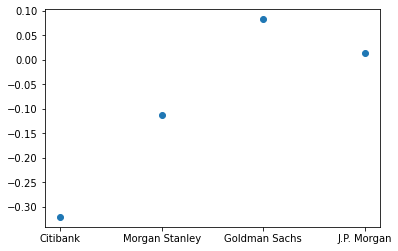

In [22]:
# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

In [23]:
# Portfolio optimization relies upon an unbiased and efficient estimate of asset covariance.
# Although sample covariance is unbiased, it is not efficient--extreme events tend to be overweighted.
# One approach to alleviate this is through "covariance shrinkage", where large errors are reduced ('shrunk') to 
# improve efficiency. In this exercise, you'll use pypfopt.risk_models's CovarianceShrinkage object to transform sample
# covariance into an efficient estimate. The textbook error shrinkage method, .ledoit_wolf(), is a method of this object.

# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(portfolio)

# Compute the sample covariance matrix of returns
sample_cov = portfolio.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate and see the difference
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")
# as you see there is some slight difference between these two covariance matrix. 

Sample Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.536214        0.305045       0.217993     0.269784
Morgan Stanley  0.305045        0.491993       0.258625     0.218310
Goldman Sachs   0.217993        0.258625       0.217686     0.170937
J.P. Morgan     0.269784        0.218310       0.170937     0.264315 

Efficient Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.527505        0.288782       0.206371     0.255401
Morgan Stanley  0.288782        0.485642       0.244837     0.206671
Goldman Sachs   0.206371        0.244837       0.225959     0.161823
J.P. Morgan     0.255401        0.206671       0.161823     0.270102 



In [24]:
# Here you'll break down this period into three sub-periods, or epochs: 2005-2006 (before), 2007-2008 (during) and
# 2009-2010 (after). For each period you'll compute the efficient covariance matrix, and compare them to each other.

# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
  sub_price = portfolio.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov)

Efficient Covariance Matrices
 {'before':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.018149        0.013789       0.013183     0.013523
Morgan Stanley  0.013789        0.043021       0.030559     0.016525
Goldman Sachs   0.013183        0.030559       0.044482     0.018237
J.P. Morgan     0.013523        0.016525       0.018237     0.024182, 'during':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.713035        0.465336       0.323977     0.364848
Morgan Stanley  0.465336        0.994390       0.434874     0.298613
Goldman Sachs   0.323977        0.434874       0.408773     0.224668
J.P. Morgan     0.364848        0.298613       0.224668     0.422516, 'after':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.841156        0.344939       0.252684     0.356788
Morgan Stanley  0.344939        0.388839       0.231624     0.279727
Goldman Sachs   0.252684        0.231624

In [44]:
# VaR and CVaR
# if we know the distribution we can use ppf to caclculate VaR and if we do not know the distribution we can use
# historical observations to calculate VaR
# lets see how it works when we have a normal distribution

# first import relevant library because we want to use norm method
from scipy.stats import norm
# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95_using_ppf = norm.ppf(0.95)
VaR_95_using_ppf

1.6448536269514722

In [46]:
# Create the VaR meaasure at the 5% significance level using numpy.quantile()

draws = norm.rvs(size = 100000)
VaR_95_using_random_draw = np.quantile(draws, 0.95)
VaR_95_using_random_draw
# you see how VaR95 using both method are too close, but if the distrobution is not normal the difference would be big.

1.6449532464468721

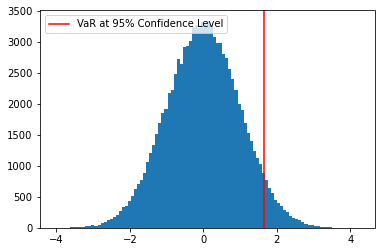

In [47]:
# Plot the normal distribution histogram and 95% VaR measure
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95_using_random_draw, c='r', label = "VaR at 95% Confidence Level")
plt.legend(); plt.show()

In [51]:
# lets have a look at CitiBank returns
Citibank_portfolio_returns.dropna(inplace=True)
Citibank_portfolio_returns

Date
2005-01-03    0.001868
2005-01-04   -0.008494
2005-01-05    0.012537
2005-01-06    0.009699
2005-01-07   -0.005722
                ...   
2010-12-23   -0.010571
2010-12-27    0.019231
2010-12-28    0.002096
2010-12-29   -0.002092
2010-12-30   -0.002096
Name: Citibank, Length: 1510, dtype: float64

In [53]:
# Compute the mean and variance of the portfolio returns
pm = Citibank_portfolio_returns.mean()
ps = Citibank_portfolio_returns.std()

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = pm, scale = ps) # loc is mean and scale is standard deviation
VaR_95

0.07538923093976377

In [54]:
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
tail_loss

0.0047332215901878995

In [55]:
CVaR_95 = (1 / (1 - 0.95)) * tail_loss
CVaR_95

0.0946644318037579

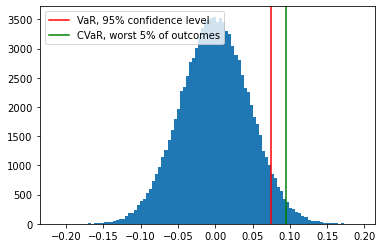

In [56]:
# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

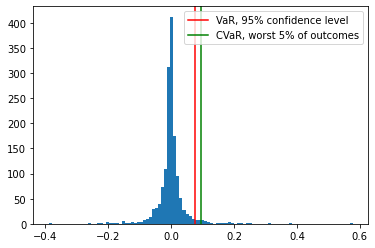

In [57]:
# Plot the real distribution histogram and add lines for the VaR and CVaR
# this one I did it myself but I am not sure if we can use ppf to calculate VaR and CVaR and then plot it using historic
# observation because we are only allowed to use ppf if we are pretty sure that the distribution of return is normal. 
plt.hist(Citibank_portfolio_returns, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

In [67]:
# t student distribution
# when we do not have a lot of observation it is better to use t distribution instead of normal distribution
# t distribution has fatter tails and its degree of freedom is the number of obsrvation minus 1, the greater the number of
# observation, the more close the t distribution to normal distribution. 
# Previously you computed the VaR and CVaR when losses were Normally distributed. Here you'll find the VaR using 
# another common loss distribution, the Student's t-distribution (or T) contained in scipy.stats.

# Import the Student's t-distribution
from scipy.stats import t

# sometimes if we have a long period of time it is better to use rolling mean and std to better grasp the situation in 
# each period of time
# Create rolling window parameter list
mu = Citibank_portfolio_returns.rolling(30).mean()
sigma = Citibank_portfolio_returns.rolling(30).std()

# You'll compute an array of 99% VaR measures from the T distribution (with 30 - 1 = 29 degrees of freedom), using 30-day
# rolling windows from investment bank portfolio 
rolling_parameters = [(29, mu[i], s) for i,s in enumerate(sigma)]
rolling_parameters

[(29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, nan, nan),
 (29, 0.0007585976396432066, 0.007365823741849755),
 (29, 0.000797852319669227, 0.007375072393057124),
 (29, 0.0009325334921854093, 0.0072351026138424614),
 (29, 0.00025709153250138563, 0.007058124706873805),
 (29, -0.000223300917302612, 0.006881590509323479),
 (29, -0.0004580565654210981, 0.007188917288733352),
 (29, 5.3267007545343416e-05, 0.0072984655863526276),
 (29, 8.089460480708392e-05, 0.0072901001041096826),
 (29, 0.0001707825659218935, 0.0072659748085018745),
 (29, 0.00011006510887153024, 0.0

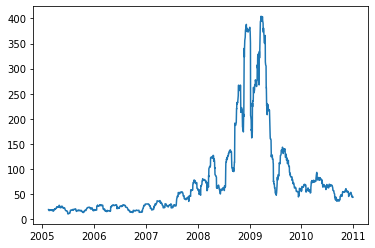

In [71]:
# Calculating rolling VaR: Compute the 99% VaR array using the rolling window parameters
VaR_99 = np.array( [ t.ppf(0.99, *params) 
                    for params in rolling_parameters ] )
# assume your initial investment is $100,000, we want to calculate how much is our risk exposure overtime
initial_investment = 100000
# risk exposure = probability of loss x loss measure x dollar amount of your initial investment
# as we use VaR 99% as our risk measure so probability of loss = 1-99% = 0.01, risk measure = 
# Plot the minimum risk exposure over the 2005-2010 time period
plt.plot(Citibank_portfolio_returns.index, 0.01 * VaR_99 * initial_investment)
plt.show()
# as you see during financial crisis the probability of loss was high

In [80]:
# calculating CVaR from t-distribution

# Fit the Student's t distribution to crisis losses
p = t.fit(Citibank_portfolio_returns)

# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect(lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
CVaR_99

0.8753276694995431

In [83]:
# in the Markowitz mpdel our risk measure was std and our efficient frontier showed portfolios returns and std,
# we can use the same approach but using other risk measures such as CVaR instead of std and find a the weights to build
# a portfolio with minimum CVaR proportionate to return. 
# the other approach is that in markowits model our objective function was "maximize the expected return"
# but we can change the objective function to "minimize CVaR at a certain confidence level"

# Import the EfficientFrontier class
from pypfopt.efficient_frontier import EfficientFrontier

# Import the negative_cvar objective function
from pypfopt.objective_functions import negative_cvar

# Create the efficient frontier instance
# note you don't need expected returns, since the objective function is different from mean-variance optimization.
ef = EfficientFrontier(None, e_cov)

# in the new vesrion the removed negative CVaR and you get error, but I kept the codes here in case in future they fix it

# Find the cVar-minimizing portfolio weights at the default 95% confidence level
returns = portfolio.pct_change()

optimal_weights = ef.custom_objective(negative_cvar, returns)  # 

# Display the optimal weights
print(optimal_weights)

ImportError: cannot import name 'negative_cvar' from 'pypfopt.objective_functions' (C:\Users\sasan\anaconda3\lib\site-packages\pypfopt\objective_functions.py)

In [84]:
Citibank_portfolio_returns

Date
2005-01-03    0.001868
2005-01-04   -0.008494
2005-01-05    0.012537
2005-01-06    0.009699
2005-01-07   -0.005722
                ...   
2010-12-23   -0.010571
2010-12-27    0.019231
2010-12-28    0.002096
2010-12-29   -0.002092
2010-12-30   -0.002096
Name: Citibank, Length: 1510, dtype: float64

In [86]:
# DEFINE the Blach-Scoles Function and also bs_delta function that calculates the delta

# The Black-Scholes option pricing formula for European options
# Adapted from: Black, F., & Scholes, M. (1973). The Pricing of Options and Corporate Liabilities. Journal of Political Economy, 81(3), 637-654, www.jstor.org/stable/1831029.
# MIT License
# Copyright (c) 2019 Jamsheed Shorish

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this file "black_scholes.py" (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

import numpy as np
from scipy.stats import norm


# Auxiliary function for d_one risk-adjusted probability
def d11(S, X, T, r, sigma):
    """This is an auxiliary function and is not intended to be called externally."""
    return (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

# Auxiliary function for d_two risk-adjusted probability    
def d21(d1, T, sigma):
    """This is an auxiliary function and is not intended to be called externally."""
    return d1 - sigma * np.sqrt(T)

# Definition of the Black-Scholes delta function    
def bs_delta(S, X, T, r, sigma, option_type):
    """Compute the delta of the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the delta value
    Exceptions raised: ValueError if option_type is not 'call' or 'put'
    """
    if option_type == 'call':
        return norm.cdf(d11(S, X, T, r, sigma))
    elif option_type == 'put':
        return norm.cdf(-d11(S, X, T, r, sigma))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

# Definition of the Black-Scholes European option pricing formula    
def black_scholes(S, X, T, r, sigma, option_type):
    """Price a European option using the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the option value
    Exceptions raised: ValueError if option_type is not 'call' or 'put'
    """
    d_one = d11(S, X, T, r, sigma)
    d_two = d21(d_one, T, sigma)
    if option_type == 'call':
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'put':
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

In [88]:
# option pricing
# Compute the volatility as the annualized standard deviation of CitiBank returns
sigma = np.sqrt(252) * Citibank_portfolio_returns.std()

# Compute the Black-Scholes option price for this volatility
value_s = black_scholes(S = 90, X = 80, T = 0.5, r = 0.02, 
                        sigma = sigma, option_type = "call")


# Display and compare both values
print("Option value: ", value_s)

Option value:  23.192009681813502


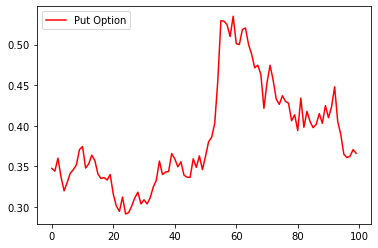

In [93]:
# Select the first 100 observations of CitiBank prices: we want to see how the option price changes with stock price
Citibank_spot = portfolio.Citibank[:100]

# Initialize the European put option values array
option_values = np.zeros(Citibank_spot.size)

# Iterate through IBM's spot price and compute the option values
for i,S in enumerate(Citibank_spot.values):
    option_values[i] = black_scholes(S = S, X = 140, T = 0.5, r = 0.02,
                        sigma = sigma, option_type = "put")

# Display the option values array
plt.plot(option_values, color = "red", label = "Put Option")

plt.legend(loc = "upper left")
plt.show()

In [94]:
# delta neutral strategy
# Compute the annualized standard deviation of `Citibank` returns
sigma = np.sqrt(252) * Citibank_portfolio_returns.std()

# Compute the Black-Scholes value at CitiBank spot price 70
value = black_scholes(S = 70, X = 80, T = 0.5, r = 0.02, 
                      sigma = sigma, option_type = "put")
# Find the delta of the option at Citibank spot price 70
delta = bs_delta(S = 70, X = 80, T = 0.5, r = 0.02, 
                 sigma = sigma, option_type = "put")

# Find the option value change when the price of Citibank falls to 69.5
value_change = black_scholes(S = 69.5, X = 80, T = 0.5, r = 0.02, 
                             sigma = sigma, option_type = "put") - value

# Show that the sum of the spot price change and the value_change weighted by 1/delta is (close to) zero
print( (69.5 - 70) + (1/delta) * value_change )

0.0028033499449947596


In [95]:
# as we saw earlier in order to calculate VaR and CVaR we can use historical data but sometimes these data
# can be misleading because it does not have things that can happen in the future is is strictly dependent 
# on what we have see so far,so in exterme situations such as financial crisis this method could be dangerous
# in order to solve this issue we can assume a distribution for our returns and use that estimation to calcualte VaR 
# and CVaR 

In [100]:
# in order to use parmaetric estimation we need to fit the distribution
# there is test called Anderson-Darling test that is used to see how well a distribution fits the data.
# In this exercise, you will estimate the 95% VaR from a Normal distribution fitted to the investment bank data.
# You'll use scipy.stats's norm distribution, assuming that it's the most appropriate class of distribution.

# Import the Normal distribution and skewness test from scipy.stats
from scipy.stats import norm, anderson

# Fit portfolio losses to the Normal distribution
params = norm.fit(Citibank_portfolio_returns)

# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = norm.ppf(0.95, *params)
print("VaR_95, assuming Normal distribution: ", VaR_95)

# Test the data for Normality
print("Anderson-Darling test result: ", '\n',anderson(Citibank_portfolio_returns))

# as you see our statistics is 115.89 which is far larger than all critical calues, for example our 99% confidence level
# critical value is 1.089 which is way smaller than 115.89, so we reject our H0 (narmal distribution), meaning that the
# distribution is not normal

VaR_95, assuming Normal distribution:  0.07536410275024016
Anderson-Darling test result:  
 AndersonResult(statistic=115.89711964840649, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


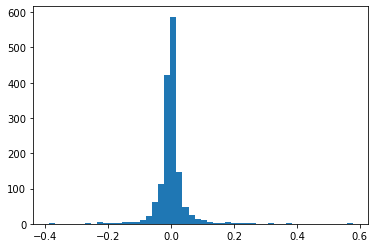

In [109]:
# the histogram also shows that it is not normally distributed. 
plt.hist(Citibank_portfolio_returns, bins = 50)
plt.show()

In [108]:
# as you see here we generated real normal numbers and our statistics of 0.238 is lower than all numbers in critical_value.
real_normal = np.random.normal(0, 1, 10000)
anderson(real_normal)

AndersonResult(statistic=0.2388763681465207, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [121]:
# In the previous exercise you found that fitting a Normal distribution to the investment bank portfolio data from
# resulted in a poor fit according to the Anderson-Darling test.
# we have a practical interesting distribution in python which is called skewed normal distribution which takes the skewnes
# into consideration

# Import the skew-normal distribution and skewness test from scipy.stats
from scipy.stats import skewnorm, skewtest

# Test the data for skewness
print("Skewtest result: ", skewtest(Citibank_portfolio_returns))

# as you see for skewed normal distribution our test's p-value is close to 0 which is smaller than alpha=5%, 
# so with 95% confidence level the Ho hyphothesis of having skewness is accepted(it has skew) so we can fit skewed normal
# distribution

Skewtest result:  SkewtestResult(statistic=18.053412224933147, pvalue=7.416403573990204e-73)


In [120]:
# Fit the portfolio loss data to the skew-normal distribution
params = skewnorm.fit(Citibank_portfolio_returns)

# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = skewnorm.ppf(0.95, *params)
print("VaR_95 from skew-normal: ", VaR_95)

VaR_95 from skew-normal:  0.07735683205019252



Skewness test for given data :
 SkewtestResult(statistic=0.9474846415337117, pvalue=0.3433918787479987)


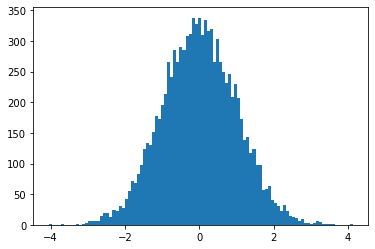

In [119]:
# as you see for normal distribution our test's p-value is 0.34 which is greater than alpha=5%, so with 95% confidence
# level the Ho hyphothesis of having skewness is rejected. 
plt.hist(real_normal, bins = 100)
  
  
print( '\nSkewness test for given data :\n', skewtest(real_normal))


Skewness for data :
 SkewtestResult(statistic=16.957642860709516, pvalue=1.689888374767126e-64)


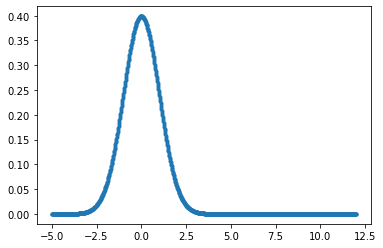

In [114]:
x1 = np.linspace( -5, 12, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )
  
plt.plot(x1, y1, '.')
  
  
print( '\nSkewness for data :\n', skewtest(y1))

In [129]:
asset_returns_2005_2006 = portfolio.loc['2005-01-01':'2006-12-31'].pct_change().dropna()
asset_returns_2005_2006

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2005-01-04,-0.008494,-0.010734,-0.006479,-0.018902
2005-01-05,0.012537,-0.005787,-0.004507,0.002083
2005-01-06,0.009699,0.023645,0.013776,0.005716
2005-01-07,-0.005722,-0.003909,-0.004276,-0.008008
2005-01-10,-0.006372,-0.000178,0.001909,-0.003385
...,...,...,...,...
2006-12-22,-0.003835,-0.013492,-0.000051,-0.015622
2006-12-26,0.010449,0.012924,0.008935,0.008770
2006-12-27,0.023403,0.015731,0.010457,0.013248


In [130]:
asset_returns_2007_2008 = portfolio.loc['2007-01-01':'2008-12-31'].pct_change().dropna()
asset_returns_2007_2008

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2007-01-04,-0.003439,0.003553,-0.009316,0.002496
2007-01-05,-0.005267,-0.012819,0.001006,-0.008300
2007-01-08,0.005112,0.006060,0.023512,0.003348
2007-01-09,-0.008719,-0.002336,0.001718,-0.004171
2007-01-10,-0.008063,0.005052,0.019747,0.007330
...,...,...,...,...
2008-12-24,0.039877,0.004155,0.016489,0.025421
2008-12-26,-0.007375,0.010345,-0.006149,-0.001675
2008-12-29,-0.023774,0.017065,0.007766,-0.000671


In [141]:
# Historical Simulation
# Historical simulation of VaR assumes that the distribution of historical losses is the same as the distribution
# of future losses. We'll test if this is true for our investment bank portfolio by comparing the 95% VaR from 
# 2005 - 2006 to the 95% VaR from 2007 - 2009.
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Create portfolio returns for the two sub-periods using the list of asset returns
portfolio_returns_2005_2006 = np.array([asset_returns_2005_2006.dot(weights)])
portfolio_returns_2007_2008 = np.array([asset_returns_2007_2008.dot(weights)])


# Derive portfolio losses from portfolio returns
losses_2005_2006 = - portfolio_returns_2005_2006
losses_2007_2008 = - portfolio_returns_2007_2008

# Find the historical simulated VaR estimates
VaR_95_2005_2006 = [np.quantile(x, 0.95) for x in losses_2005_2006]
VaR_95_2007_2008 = [np.quantile(x, 0.95) for x in losses_2007_2008]

# Display the VaR estimates
print("VaR_95, 2005-2006: ", VaR_95_2005_2006, '; VaR_95, 2007-2009: ', VaR_95_2007_2008 )


VaR_95, 2005-2006:  [0.014700230288819614] ; VaR_95, 2007-2009:  [0.05492612752617144]


In [142]:
# MONTE CARLO SIMULATION
# The parmaetric estimation has its own problem because defining a current distribution is not easy and we might assume 
# a wrong distribution which lead to wrong estimation for VaR.
# Monte Carlo simulaton is a good method that combines parametric and historical method.
# this method assumes a distribution or distributions for portfolio return and/or portfolio risk measure and the uses these
# distributions to crease randowm draws and then simulate the porfoli performance based on those random draws. 
# lets do the simulation assuming normal distribution for returns and also losses which are equal to minus returns

# Initialize daily cumulative loss for the 4 assets, across N runs
# this will eventually be used to sum up simulated minute-by-minute losses for all 4 assets.

N = 10000
number_of_avaialabe_companies = 4
daily_loss = np.zeros((number_of_avaialabe_companies , N))
daily_loss


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [155]:
# Create the Monte Carlo simulations for N runs
total_steps = 1440 # 1 day is 1440 minutes
cov = portfolio.pct_change().cov()
portfolio_returns = portfolio.pct_change().dropna()
portfolio_losses = -portfolio_returns
mu = portfolio_losses.mean()
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = np.array(cov @ norm.rvs(size = (4,total_steps)))
    # Adjust simulated path by total_steps and mean of portfolio losses
    steps = 1/total_steps
    minute_losses = mu * steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)

    


ValueError: operands could not be broadcast together with shapes (4,) (4,1440) 

In [ ]:
# the above and the below code is monte carlo simulation but both of them gives error. but i put them in case i can fi
# them later

# Initialize daily cumulative loss for the assets, across N runs
daily_loss = np.zeros((4,N))

# Create the Monte Carlo simulations for N runs
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = e_cov @ norm.rvs(size = (4,total_steps))
    # Adjust simulated path by total_steps and mean of portfolio losses
    steps = 1/total_steps
    minute_losses = mu * steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)
    
# Generate the 95% VaR estimate
losses = weights @ daily_loss
print("Monte Carlo VaR_95 estimate: ", np.quantile(losses, 0.95))

In [157]:
# structural break and chow test
# So far we calculated VaR by three methods, historic, parmanetric, and monte carlo simulation, all of which assumed that
# the distribution of return is always stay the same, whereas in reality it may not be like that, for example we have
# seen that the efficient frontier sometimes changes (before and after financial crisis) which is showing that the 
# distribution of return is not stationary and changes from time to time. 
# Estimation techniques require stationarity:
#    Historical: unknown stationary distribution from past data
#    Parametric: assumed stationary distribution class
#    Monte Carlo: assumed stationary distribution for random draws

# Non-stationary => perhaps distribution changes over time
#    Assume specific points in time for change
#    Break up data into sub-periods
#    Within each sub-period, assume stationarity
# Structural break(s): point(s) of change
#    Change in 'trend' of average and/or volatility of data

# Chow Test:
#   Test for existence of structural break given linear model
#   Null hypothesis: no break
#   Requires three OLS regressions
#     Regression for entire period
#     Two regressions, before and a/er break
#   Collect sum-of-squared residuals
#   Test statistic is distributed according to "F" distribution

In [158]:
# You have already seen in Chapters 1 and 2 that the global financial crisis changed investor perception regarding
# market risk, and influenced investor decisions on portfolio allocations to manage risk.
# Now you'll have a chance to investigate whether something "structural" changed between 2005 and 2010.
# In this exercise you can see if quarterly minimum portfolio values and mean return volatility time series together
# identify a structural break.
# You'll check this first with a simple visualization of the data. Plot the quarterly minimum portfolio returns
# port_q_min and mean return volatility vol_q_mean to identify a date where a structural break may have occurred.

# lets first build a portfolio with equal weights
asset_returns= portfolio.pct_change().dropna()
asset_returns

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2005-01-03,0.001868,0.006844,0.008747,0.003589
2005-01-04,-0.008494,-0.010734,-0.006479,-0.018902
2005-01-05,0.012537,-0.005787,-0.004507,0.002083
2005-01-06,0.009699,0.023645,0.013776,0.005716
2005-01-07,-0.005722,-0.003909,-0.004276,-0.008008
...,...,...,...,...
2010-12-23,-0.010571,0.000365,-0.011792,-0.001897
2010-12-27,0.019231,0.003648,0.013305,0.014021
2010-12-28,0.002096,0.005453,-0.003768,-0.001406


In [163]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
portfolio_returns = asset_returns.dot(weights)
portfolio_returns

Date
2005-01-03    0.005262
2005-01-04   -0.011152
2005-01-05    0.001081
2005-01-06    0.013209
2005-01-07   -0.005479
                ...   
2010-12-23   -0.005974
2010-12-27    0.012551
2010-12-28    0.000594
2010-12-29   -0.007729
2010-12-30   -0.000818
Length: 1510, dtype: float64

In [164]:
# get the quarterly minimum return
port_q_min =  portfolio_returns.resample('Q').min().dropna()
port_q_min

Date
2005-03-31   -0.021728
2005-06-30   -0.022794
2005-09-30   -0.014764
2005-12-31   -0.013551
2006-03-31   -0.028963
2006-06-30   -0.034735
2006-09-30   -0.019315
2006-12-31   -0.024550
2007-03-31   -0.052700
2007-06-30   -0.024104
2007-09-30   -0.053640
2007-12-31   -0.060247
2008-03-31   -0.057646
2008-06-30   -0.056931
2008-09-30   -0.153131
2008-12-31   -0.198734
2009-03-31   -0.189147
2009-06-30   -0.101852
2009-09-30   -0.054325
2009-12-31   -0.050587
2010-03-31   -0.051042
2010-06-30   -0.070714
2010-09-30   -0.034097
2010-12-31   -0.028097
Freq: Q-DEC, dtype: float64

In [167]:
vol_q_mean = portfolio_returns.resample('Q').std().dropna()
vol_q_mean

Date
2005-03-31    0.008720
2005-06-30    0.009581
2005-09-30    0.006772
2005-12-31    0.008161
2006-03-31    0.008673
2006-06-30    0.013040
2006-09-30    0.009536
2006-12-31    0.008521
2007-03-31    0.013658
2007-06-30    0.010031
2007-09-30    0.020693
2007-12-31    0.024946
2008-03-31    0.034709
2008-06-30    0.025561
2008-09-30    0.056815
2008-12-31    0.090745
2009-03-31    0.085511
2009-06-30    0.040480
2009-09-30    0.022384
2009-12-31    0.018893
2010-03-31    0.017190
2010-06-30    0.023585
2010-09-30    0.015464
2010-12-31    0.014843
Freq: Q-DEC, dtype: float64

In [175]:
mort_del

,const,Mortgage Delinquency Rate
Date,,
2005-03-31,1.0,0.0155
2005-06-30,1.0,0.0159
2005-09-30,1.0,0.0163
2005-12-31,1.0,0.0161
2006-03-31,1.0,0.0162
2006-06-30,1.0,0.0174
2006-09-30,1.0,0.0192
2006-12-31,1.0,0.0208
2007-03-31,1.0,0.0231


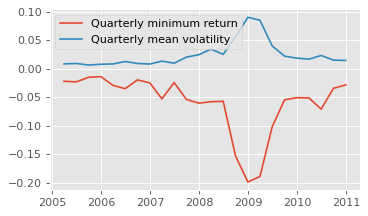

In [171]:
# plot to see where it seems that there is a break

# the plot was too big, so i added the below code to make it smaller
from matplotlib.pyplot import figure

figure(figsize=(5, 3), dpi=80)

# Create a plot of quarterly minimum portfolio returns
plt.plot(port_q_min, label="Quarterly minimum return")

# Create a plot of quarterly mean volatility
plt.plot(vol_q_mean, label="Quarterly mean volatility")

# Create legend and plot
plt.legend()
plt.show()


In [178]:
mort_del

,Mortgage Delinquency Rate
Date,
2005-03-31,0.0155
2005-06-30,0.0159
2005-09-30,0.0163
2005-12-31,0.0161
2006-03-31,0.0162
2006-06-30,0.0174
2006-09-30,0.0192
2006-12-31,0.0208
2007-03-31,0.0231


In [198]:
# put returns and delinquency in one dataframe
df = pd.DataFrame(port_q_min)
df = df.rename(columns={0: 'returns'})
df['mort_del'] = mort_del
df

,returns,mort_del
Date,,
2005-03-31,-0.021728,0.0155
2005-06-30,-0.022794,0.0159
2005-09-30,-0.014764,0.0163
2005-12-31,-0.013551,0.0161
2006-03-31,-0.028963,0.0162
2006-06-30,-0.034735,0.0174
2006-09-30,-0.019315,0.0192
2006-12-31,-0.024550,0.0208
2007-03-31,-0.052700,0.0231


In [201]:
before = df.loc[:'2008-07-30':,: ]
before

,returns,mort_del
Date,,
2005-03-31,-0.021728,0.0155
2005-06-30,-0.022794,0.0159
2005-09-30,-0.014764,0.0163
2005-12-31,-0.013551,0.0161
2006-03-31,-0.028963,0.0162
2006-06-30,-0.034735,0.0174
2006-09-30,-0.019315,0.0192
2006-12-31,-0.024550,0.0208
2007-03-31,-0.052700,0.0231


In [202]:
after = df.loc['2008-07-30':,: ]
after

,returns,mort_del
Date,,
2008-09-30,-0.153131,0.0659
2008-12-31,-0.198734,0.0796
2009-03-31,-0.189147,0.0858
2009-06-30,-0.101852,0.0953
2009-09-30,-0.054325,0.1034
2009-12-31,-0.050587,0.1154
2010-03-31,-0.051042,0.1106
2010-06-30,-0.070714,0.1059
2010-09-30,-0.034097,0.1036


In [203]:
# Import the statsmodels API to be able to run regressions
import statsmodels.api as sm

# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Regress quarterly minimum portfolio returns against mortgage delinquencies
result = sm.OLS(port_q_min, mort_del).fit()

# Retrieve the sum-of-squared residuals
ssr_total = result.ssr
print("Sum-of-squared residuals, 2005-2010: ", ssr_total)

Sum-of-squared residuals, 2005-2010:  0.050393311024901334


In [204]:
# Now you can put everything together to perform the Chow test.
# The 2005 - 2010 data have been split into two available DataFrames, before and after, using June 30, 2008 as 
# the structural break point (identified in the first exercise in this series). The columns of both DataFrames
# are mort_del and returns for mortgage delinquency data and returns data, respectively.
# You'll run two OLS regressions on before and after, regressing the returns column against the mort_del column in 
# each DataFrame, and derive the sum-of-squared residuals.
# Then you'll compute the Chow test statistic as in the video, using ssr_total (provided from the second exercise)
# and the derived residuals. The critical F-value at 99% confidence is around 5.85. What value do you find for your
# test statistic?
# Add intercept constants to each sub-period 'before' and 'after'

before_with_intercept = sm.add_constant(before['mort_del'])
after_with_intercept  = sm.add_constant(after['mort_del'])

# Fit OLS regressions to each sub-period
r_b = sm.OLS(before['returns'], before_with_intercept).fit()
r_a = sm.OLS(after['returns'],  after_with_intercept).fit()

# Get sum-of-squared residuals for both regressions
ssr_before = r_b.ssr
ssr_after = r_a.ssr
# Compute and display the Chow test statistic
numerator = ((ssr_total - (ssr_before + ssr_after)) / 2)
denominator = ((ssr_before + ssr_after) / (24 - 4))
print("Chow test statistic: ", numerator / denominator)

Chow test statistic:  28.931473605474793


In [235]:
# Volatility and structural breaks
# Visualizing volatility changes helps reveal possible structural break points in time series. 
# By identifying when volatility appears to change, an informed choice of break point can be made that can, in turn, be 
# used for further statistical analysis (such as the Chow test).

# You'll examine two visualizations of volatility for the investment bank portfolio from 2008 - 2009, for two available
# portfolio weights: weights_with_citi and weights_without_citi. These correspond, respectively, to equal-weighted
# portfolios with and without Citibank, which exhibited (as you saw in Chapter 1) the highest volatility of the 
# four assets over the period.

asset_prices = portfolio.loc['2008-01-01':'2009-12-31']
asset_returns = asset_prices.pct_change()
asset_returns


,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2008-01-02,NaN,NaN,NaN,NaN
2008-01-03,0.000346,-0.000196,-0.013295,-0.006877
2008-01-04,-0.023851,-0.032195,-0.023970,-0.022684
2008-01-07,0.000708,-0.020081,-0.026009,0.010017
2008-01-08,-0.039632,-0.039536,-0.026858,-0.039671
...,...,...,...,...
2009-12-24,0.018237,0.006460,0.002078,0.007940
2009-12-28,0.011940,-0.010473,-0.001281,-0.004058
2009-12-29,-0.005900,0.004780,0.002198,-0.005513


In [236]:
# Find the time series of returns with and without Citibank

weights_with_citi = np.array([0.25, 0.25, 0.25, 0.25])
weights_without_citi = np.array([0, 1/3, 1/3, 1/3])

ret_with_citi = asset_prices.pct_change().dot(weights_with_citi)
ret_without_citi = asset_prices.pct_change().dot(weights_without_citi)

ret_with_citi

Date
2008-01-02         NaN
2008-01-03   -0.005006
2008-01-04   -0.025675
2008-01-07   -0.008841
2008-01-08   -0.036424
                ...   
2009-12-24    0.008679
2009-12-28   -0.000968
2009-12-29   -0.001109
2009-12-30    0.000972
2009-12-31    0.004232
Length: 505, dtype: float64

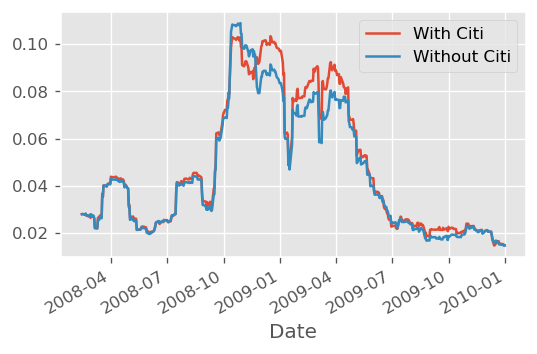

In [237]:
# Find the average 30-day rolling window volatility as the standard deviation
vol_with_citi = ret_with_citi.rolling(30).std().dropna().rename("With Citi")
vol_without_citi = ret_without_citi.rolling(30).std().dropna().rename("Without Citi")

figure(figsize=(5, 3), dpi=120)

# Combine two volatilities into one Pandas DataFrame
# Plot volatilities over time
vol_with_citi.plot()
vol_without_citi.plot()
plt.legend()
plt.show()

In [247]:
# Extreme values and backtesting
# Extreme values are those which exceed a threshold and are used to determine if risk measures such as VaR are
# accurately reflecting the risk of loss.

# You'll explore extreme values by computing the 95% VaR of the equally-weighted investment bank portfolio for 2009-2010
# (recall that this is equivalent to historical simulation from 2010 onwards), and then backtesting on data from 2007-2008.

# lets separate date to after and before, we use before as a backtest data
backtest_asset_prices = portfolio.loc['2006-12-31':'2009-01-01']
weights = np.array([0.25, 0.25, 0.25, 0.25])
backtest_data = -backtest_asset_prices.pct_change().dot(weights).dropna()
backtest_data


Date
2007-01-04    0.001676
2007-01-05    0.006345
2007-01-08   -0.009508
2007-01-09    0.003377
2007-01-10   -0.006016
                ...   
2008-12-24   -0.021486
2008-12-26    0.001213
2008-12-29   -0.000096
2008-12-30   -0.041903
2008-12-31   -0.021971
Length: 503, dtype: float64

In [248]:
estimate_asset_prices = portfolio.loc['2009-01-01':'2011-01-01']
weights = np.array([0.25, 0.25, 0.25, 0.25])
estimate_data = -estimate_asset_prices.pct_change().dot(weights).dropna()
estimate_data

Date
2009-01-05    0.003756
2009-01-06   -0.046415
2009-01-07    0.056127
2009-01-08   -0.005244
2009-01-09    0.026969
                ...   
2010-12-23    0.005974
2010-12-27   -0.012551
2010-12-28   -0.000594
2010-12-29    0.007729
2010-12-30    0.000818
Length: 502, dtype: float64

VaR_95:  0.04998250701171095 ; Backtest:  0.06560636182902585


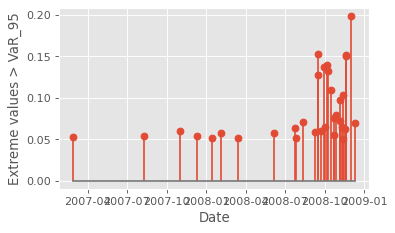

In [252]:
# Compute the 95% VaR on 2009-2010 losses
VaR_95 = np.quantile(estimate_data, 0.95)

# Find backtest_data exceeding the 95% VaR
extreme_values = backtest_data[backtest_data > VaR_95]

# Compare the fraction of extreme values for 2007-2008 to the Var_95 estimate
print("VaR_95: ", VaR_95, "; Backtest: ", len(extreme_values) / len(backtest_data) )

# Plot the extreme values and look for clustering
figure(figsize=(5, 3), dpi=80)

plt.stem(extreme_values.index, extreme_values)
plt.ylabel("Extreme values > VaR_95"); plt.xlabel("Date")
plt.show()

In [257]:
# So far we have seen risk are associated with mostly unlikely but potential events, and we saw that portfolio losses often
# suffer from extreme value, ie. losses that are exteremly large. they are also called losses in the tail of the underlying
# distribution, since they occur relatively rarely. This tail losses are very useful, because if modeled properly, they 
# contain precisely that risk of loss that we want to manage (losses exceeding some value).
# extreme value theory uses statistics to help understand the distribution of extreme values, in other words it is a way to
# help model the tail of the distribution. one way to do this is called block maxima approach. 
# black maxima approach:
# the idea is to take data over a time period, break up that period into sub periods (called blocks), and look at the 
# maximum loss in each block. 
# another approach called Peak Over Threshold (POT)
# this approach makes all losses above a given level the dataset of interest, which is similar to what we did in above. 
# for this chapter we will use the block maxima approach. 


In [259]:
# Block Maxima

# lets do it for only one stock instead of a portfolio
Citibank_portfolio_returns = portfolio['Citibank'].pct_change().dropna()
Citibank_portfolio_returns

Date
2005-01-03    0.001868
2005-01-04   -0.008494
2005-01-05    0.012537
2005-01-06    0.009699
2005-01-07   -0.005722
                ...   
2010-12-23   -0.010571
2010-12-27    0.019231
2010-12-28    0.002096
2010-12-29   -0.002092
2010-12-30   -0.002096
Name: Citibank, Length: 1510, dtype: float64

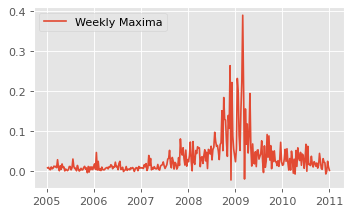

<Figure size 1152x864 with 0 Axes>

In [262]:
losses = -Citibank_portfolio_returns
# Resample the data into weekly blocks
weekly_maxima = losses.resample("W").max()

# Plot the resulting weekly maxima
figure(figsize=(5, 3), dpi=80)

plt.plot(weekly_maxima, label = "Weekly Maxima")
plt.legend()
plt.figure("weekly")
plt.show()

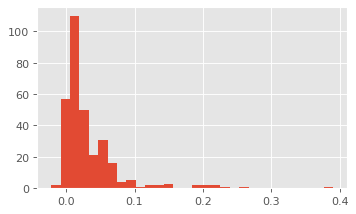

In [269]:
figure(figsize=(5, 3), dpi=80)
plt.hist(weekly_maxima, bins=30)
plt.show()

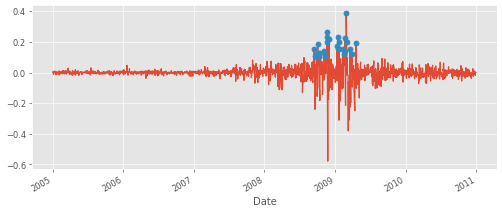

In [278]:
figure(figsize=(10, 4), dpi=60)

# Plot the log daily losses of GE over the period 2007-2009
losses.plot()

# Find all daily losses greater than 10%
extreme_losses = losses[losses>0.1]

# Scatter plot the extreme losses
extreme_losses.plot(style='o')
plt.show()

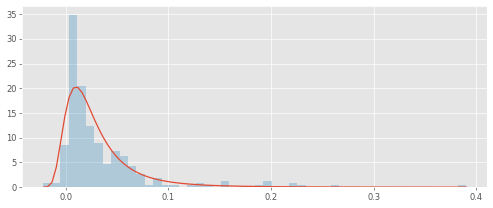

In [337]:
# as you see the weekly maxima's distribution is not normal. this distribution is called Generalized Extreme Value (GEV)
# just like normal or other distribution we can use the fit method. 

from scipy.stats import genextreme

# Fit extreme distribution to weekly maximum of losses
GEV_params = genextreme.fit(weekly_maxima)

# Plot extreme distribution with weekly max losses historgram
x = np.linspace(min(weekly_maxima), max(weekly_maxima), 100)

figure(figsize=(10, 4), dpi=60)


plt.plot(x, genextreme.pdf(x, *GEV_params))
plt.hist(weekly_maxima, 50, density = True, alpha = 0.3)
plt.show()

# as you see the GEV distribution is relatively close to the real distribution of maximum weekly loss distribution.  

In [338]:
# Suppose that you were holding € 1,000,000 of CitiBank stock on January 1, 2011. You would like to cover the expected 
# maximum losses that might occur over the next week, based upon available data from the previous two years,
# You assume that maximum weekly losses for CitiBank are distributed according to a Generalized Extreme Value (GEV) 
# distribution.
# using the above information we can calculate the maximum loss over one week period at 99% confidence. 
# In order to calculate CVaR we need to Compute the 99% VaR (needed for the CVaR computation)
VaR_99 = genextreme.ppf(0.99, *GEV_params)
VaR_99

0.1777542895988679

In [339]:
# the VaR and CVaR are frecquently used in the financial services sector in order to cover losses. which is an integral 
# of enterprise risk managment. there is a regulatory requirment that banks keep enough reserves( called reserve requirment)
# on hand to cover losses over a particular period (say one week or 10 days) at a particular confidence level (say 99%).
# we can use the VaR estimate from the GEV distribution to compute the required reserve, which should be equal to a maximum 
# loss for a given period at a given confidence level. 
# Compute the 99% CVaR estimate - as you see similar to norm, GEV has also the expect method.
reserve_requirement = 1000000 * VaR_99
reserve_requirement
# keep in mind that as the portfolio value changes, the reserve requirment changes accordingly. How frequently the reserve 
# requirement changes is given by legal regulation. 

177754.2895988679

In [340]:
# you can use CVaR also instead of VaR to calculate covering loss amount
CVaR_99 = (1 / (1 - 0.99)) * genextreme.expect(lambda x: x, 
           args=(GEV_params[0],), loc = GEV_params[1], scale = GEV_params[2], lb = VaR_99)

# Display the covering loss amount
print("Reserve amount: ", 1000000 * CVaR_99)

Reserve amount:  259517.35821243993


In [341]:
# Kernel Density Distribution
# up until now we assuemd a distribution based on looking at the histogram or using some tests to see what distributio
# we should assign to the sample observation and then using fit method we calculated the corrseponding parameters
real_normal = np.random.normal(5.5, 99.5, 10000)
test_parameteres = norm.fit(real_normal)
test_parameteres

(4.956777804806166, 97.07925899839691)

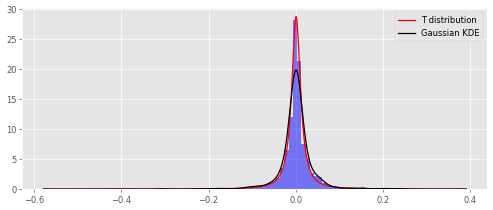

In [342]:
# KDE of a loss distribution
# Kernel density estimation (KDE) can fit distributions with 'fat tails', i.e. distributions with occasionally large
# deviations from the mean (such as the distribution of portfolio losses).
# In Chapter 2 you learned about the Student's T distribution, which for low degrees of freedom can also capture this
# feature of portfolio losses.
# You'll compare a Gaussian KDE with a T distribution, each fitted to provided portfolio losses from.
# You'll visualize the relative fits of each using a histogram. (Recall the T distribution uses fitted parameters params,
# while the gaussian_kde, being non-parametric, returns a function.)

from scipy.stats import gaussian_kde

# Generate a fitted T distribution over losses
t_params = t.fit(losses)

# Generate a Gaussian kernal density estimate over losses
kde = gaussian_kde(losses)

figure(figsize=(10, 4), dpi=60)
# Add the PDFs of both estimates to a histogram, and display
loss_range = np.linspace(np.min(losses), np.max(losses), 1000)
plt.hist(losses, density=1, bins = 100, alpha = 0.50, color='Blue')
plt.plot(loss_range, t.pdf(loss_range, *t_params), label = 'T distribution', color = 'Red')
plt.plot(loss_range, kde.pdf(loss_range), label = 'Gaussian KDE', color = 'Black')
plt.legend(); plt.show()

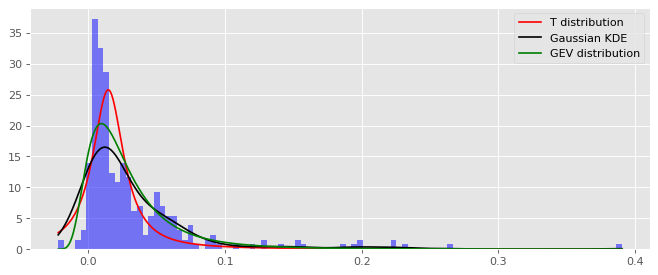

In [343]:
# Generate a fitted T distribution over weekly_maxima
t_params = t.fit(weekly_maxima)

# Generate a Gaussian kernal density estimate over weekly_maxima
kde = gaussian_kde(weekly_maxima)

figure(figsize=(10, 4), dpi=80)
# Add the PDFs of three estimates to a histogram, and display
loss_range = np.linspace(np.min(weekly_maxima), np.max(weekly_maxima), 1000)
plt.hist(weekly_maxima, density=True , bins = 100, alpha = 0.50, color='Blue')
plt.plot(loss_range, t.pdf(loss_range, *t_params), label = 'T distribution', color = 'Red')
plt.plot(loss_range, kde.pdf(loss_range), label = 'Gaussian KDE', color = 'Black')
plt.plot(loss_range, genextreme.pdf(loss_range, *GEV_params), label = 'GEV distribution', color = 'Green')
plt.legend(); plt.show()

In [348]:
# lets calculate CVaR for T and GDE distribution. we do not have expect method for KDE, if we want to calculate CVaR for
# KDE, we need to do it manually, you can look for how to do it later.

# Find the VaR as a quantile of random samples from the distributions
VaR_99_T = t.ppf(0.99, *t_params)

VaR_99_GEV = genextreme.ppf(0.99, *GEV_params)


# Find the expected tail losses, with lower bounds given by the VaR measures
integral_T   = t.expect(lambda x: x, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99_T)
integral_GEV = genextreme.expect(lambda x: x,
                                 args=(GEV_params[0],), loc = GEV_params[1], scale = GEV_params[2], lb = VaR_99_GEV)


# Create the 99% CVaR estimates
CVaR_99_T   = (1 / (1 - 0.99)) * integral_T
CVaR_99_GEV = (1 / (1 - 0.99)) * integral_GEV

# Display the results
print("99% CVaR for T: ", CVaR_99_T, ";      99% CVaR for GEV: ", CVaR_99_GEV)

# which of these is best for risk management? One way to choose is to select the distribution that provides the
# largest loss cover, to cover the "worst worst-case scenario" of losses. so T is better because it has a greater CVaR.

99% CVaR for T:  0.8581346919048466 ;      99% CVaR for GEV:  0.25951735821243993


Epoch 1/200
313/313 [==============================] - 1s 748us/step - loss: 20332.0525
Epoch 2/200
313/313 [==============================] - 0s 777us/step - loss: 239.8562
Epoch 3/200
313/313 [==============================] - 0s 732us/step - loss: 238.8917
Epoch 4/200
313/313 [==============================] - 0s 793us/step - loss: 218.5922
Epoch 5/200
313/313 [==============================] - 0s 972us/step - loss: 220.0557
Epoch 6/200
313/313 [==============================] - ETA: 0s - loss: 214.101 - 0s 745us/step - loss: 213.8227
Epoch 7/200
313/313 [==============================] - 0s 831us/step - loss: 212.6210
Epoch 8/200
313/313 [==============================] - 0s 940us/step - loss: 200.9929
Epoch 9/200
313/313 [==============================] - 0s 790us/step - loss: 192.4285
Epoch 10/200
313/313 [==============================] - 0s 799us/step - loss: 193.4637
Epoch 11/200
313/313 [==============================] - 0s 761us/step - loss: 182.8882
Epoch 12/200
313/313 [==

313/313 [==============================] - 0s 1ms/step - loss: 47.8238
Epoch 97/200
313/313 [==============================] - 0s 997us/step - loss: 46.9452
Epoch 98/200
313/313 [==============================] - 0s 1ms/step - loss: 50.3231
Epoch 99/200
313/313 [==============================] - 0s 1ms/step - loss: 45.9337
Epoch 100/200
313/313 [==============================] - 0s 1ms/step - loss: 47.7221
Epoch 101/200
313/313 [==============================] - 0s 1ms/step - loss: 46.7893
Epoch 102/200
313/313 [==============================] - 0s 981us/step - loss: 47.0752
Epoch 103/200
313/313 [==============================] - 0s 857us/step - loss: 45.2575
Epoch 104/200
313/313 [==============================] - 0s 1ms/step - loss: 47.7809
Epoch 105/200
313/313 [==============================] - 0s 921us/step - loss: 45.1069
Epoch 106/200
313/313 [==============================] - 0s 927us/step - loss: 45.8647
Epoch 107/200
313/313 [==============================] - 0s 1ms/step - l

313/313 [==============================] - 0s 889us/step - loss: 19.6235
Epoch 191/200
313/313 [==============================] - 0s 838us/step - loss: 19.7309
Epoch 192/200
313/313 [==============================] - 0s 1ms/step - loss: 17.8325
Epoch 193/200
313/313 [==============================] - 0s 991us/step - loss: 17.7821
Epoch 194/200
313/313 [==============================] - 0s 885us/step - loss: 17.3672
Epoch 195/200
313/313 [==============================] - 0s 975us/step - loss: 17.3653
Epoch 196/200
313/313 [==============================] - 0s 924us/step - loss: 17.6453
Epoch 197/200
313/313 [==============================] - 0s 1ms/step - loss: 18.1348
Epoch 198/200
313/313 [==============================] - 0s 975us/step - loss: 17.0208
Epoch 199/200
313/313 [==============================] - 0s 1ms/step - loss: 16.8881
Epoch 200/200
313/313 [==============================] - 0s 917us/step - loss: 17.3192


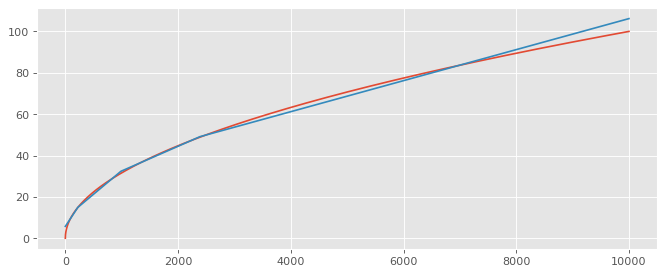

In [356]:
# Neural Networks in Portfolio Risk Management
# To become comfortable using neural networks it will be helpful to start with a simple approximation of a function.
# You'll train a neural network to approximate a mapping between an input, x, and an output, y. They are related by 
# the square root function, i.e. y=sqrt(x) 

# lets create a sufficient number of x and ys for training
x = np.array(range(0, 10000))
# Create the training values from the square root function
y = np.sqrt(x)


from keras.models import Sequential
from keras.layers import Dense

# Create the neural network
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(1))

# Train the network
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(x, y, epochs=200)

## Plot the resulting approximation and the training values
figure(figsize=(10, 4), dpi=80)

plt.plot(x, y, x, model.predict(x))
plt.show()

Epoch 1/100
48/48 [==============================] - 1s 743us/step - loss: 11.9555
Epoch 2/100
48/48 [==============================] - 0s 765us/step - loss: 9.4141
Epoch 3/100
48/48 [==============================] - 0s 828us/step - loss: 7.5812
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 6.0036
Epoch 5/100
48/48 [==============================] - 0s 806us/step - loss: 4.6715
Epoch 6/100
48/48 [==============================] - 0s 722us/step - loss: 3.6544
Epoch 7/100
48/48 [==============================] - 0s 955us/step - loss: 2.9850
Epoch 8/100
48/48 [==============================] - 0s 722us/step - loss: 2.4077
Epoch 9/100
48/48 [==============================] - 0s 764us/step - loss: 1.9499
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 1.5368
Epoch 11/100
48/48 [==============================] - 0s 806us/step - loss: 1.1922
Epoch 12/100
48/48 [==============================] - 0s 700us/step - loss: 0.9053
Epoch 13/100
48/

48/48 [==============================] - 0s 976us/step - loss: 0.0101


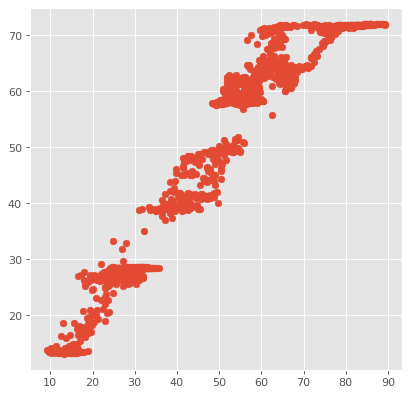

In [361]:
# Asset price prediction using Neural Network
# Now you can use a neural network to predict an asset price, which is a large component of quantitative
# financial analysis as well as risk management
# You'll create and train a neural network with one input layer, one output layer and two hidden layers.

# Set the input data to be all bank prices except Morgan Stanley, and the output data to be only Morgan Stanley's prices.
prices = portfolio

# Set the input data to be all bank prices except Morgan Stanley, and the output data to be only Morgan Stanley's prices.
# Set the input and output data
training_input = prices.drop('Morgan Stanley', axis=1)
training_output = prices['Morgan Stanley']

# Create a Sequential neural network model with two Dense hidden layers: the first with 16 neurons 
# (and three input neurons), and the second with 8 neurons.
# Create and train the neural network with two hidden layers
model = Sequential()
model.add(Dense(16, input_dim=3, activation='sigmoid'))
model.add(Dense(8, activation='relu'))

# Add a single Dense output layer of 1 neuron to represent Morgan Stanley's price.
model.add(Dense(1))

model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
model.fit(training_input, training_output, epochs=100)

# Scatter plot of the resulting model prediction
figure(figsize=(6, 6), dpi=80)
plt.scatter(training_output, model.predict(training_input)); plt.show()